In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221212_junk_mon.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df

,created_at,text,author_id,username
0,2022-12-13 01:00:00,JUNK 伊集院光・深夜の馬鹿力 | TBSラジオ https://t.co/WGpmdV...,2416810278,chirorian_p
1,2022-12-13 01:00:00,#ijuin,1237141091381415937,S_crew_954
2,2022-12-13 01:00:00,ﾊｼﾞﾏﾀ #ijuin,164686204,knightgull
3,2022-12-13 01:00:00,いじゅまたよ #ijuin #しんばか,91779722,kabutoyama_02
4,2022-12-13 01:00:01,#ijuin,964898636323733504,N46_sub
...,...,...,...,...
2230,2022-12-13 03:02:49,今週もトーク、コーナー沢山笑った。 さて寝るか。 #ijuin,1454633400946495488,y2hige
2231,2022-12-13 03:03:25,＼どうしよう…／ はい、皆さまお疲れさまでした(*´□｀)ﾉかなり寒い日が増えてきましたし...,716797454134353920,midhisky25bk
2232,2022-12-13 03:03:27,ズボン入ってるの1/18発売だー #ijuin ニュー・アルバム「MOUNTAIN BANA...,1388350532008349699,Tic_Chopist
2233,2022-12-13 03:03:42,#ijuin そのナイキのスニーカーを東京オリンピックのマラソンで履いて良いのかどうかで揉め...,1378641049,KinyouLeader


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-13 01:00:00,84
1,2022-12-13 01:01:00,38
2,2022-12-13 01:02:00,38
3,2022-12-13 01:03:00,22
4,2022-12-13 01:04:00,21
...,...,...
120,2022-12-13 03:00:00,28
121,2022-12-13 03:01:00,12
122,2022-12-13 03:02:00,6
123,2022-12-13 03:03:00,3


In [4]:
filename =  "count_221212_junk_mon.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(84, 1)

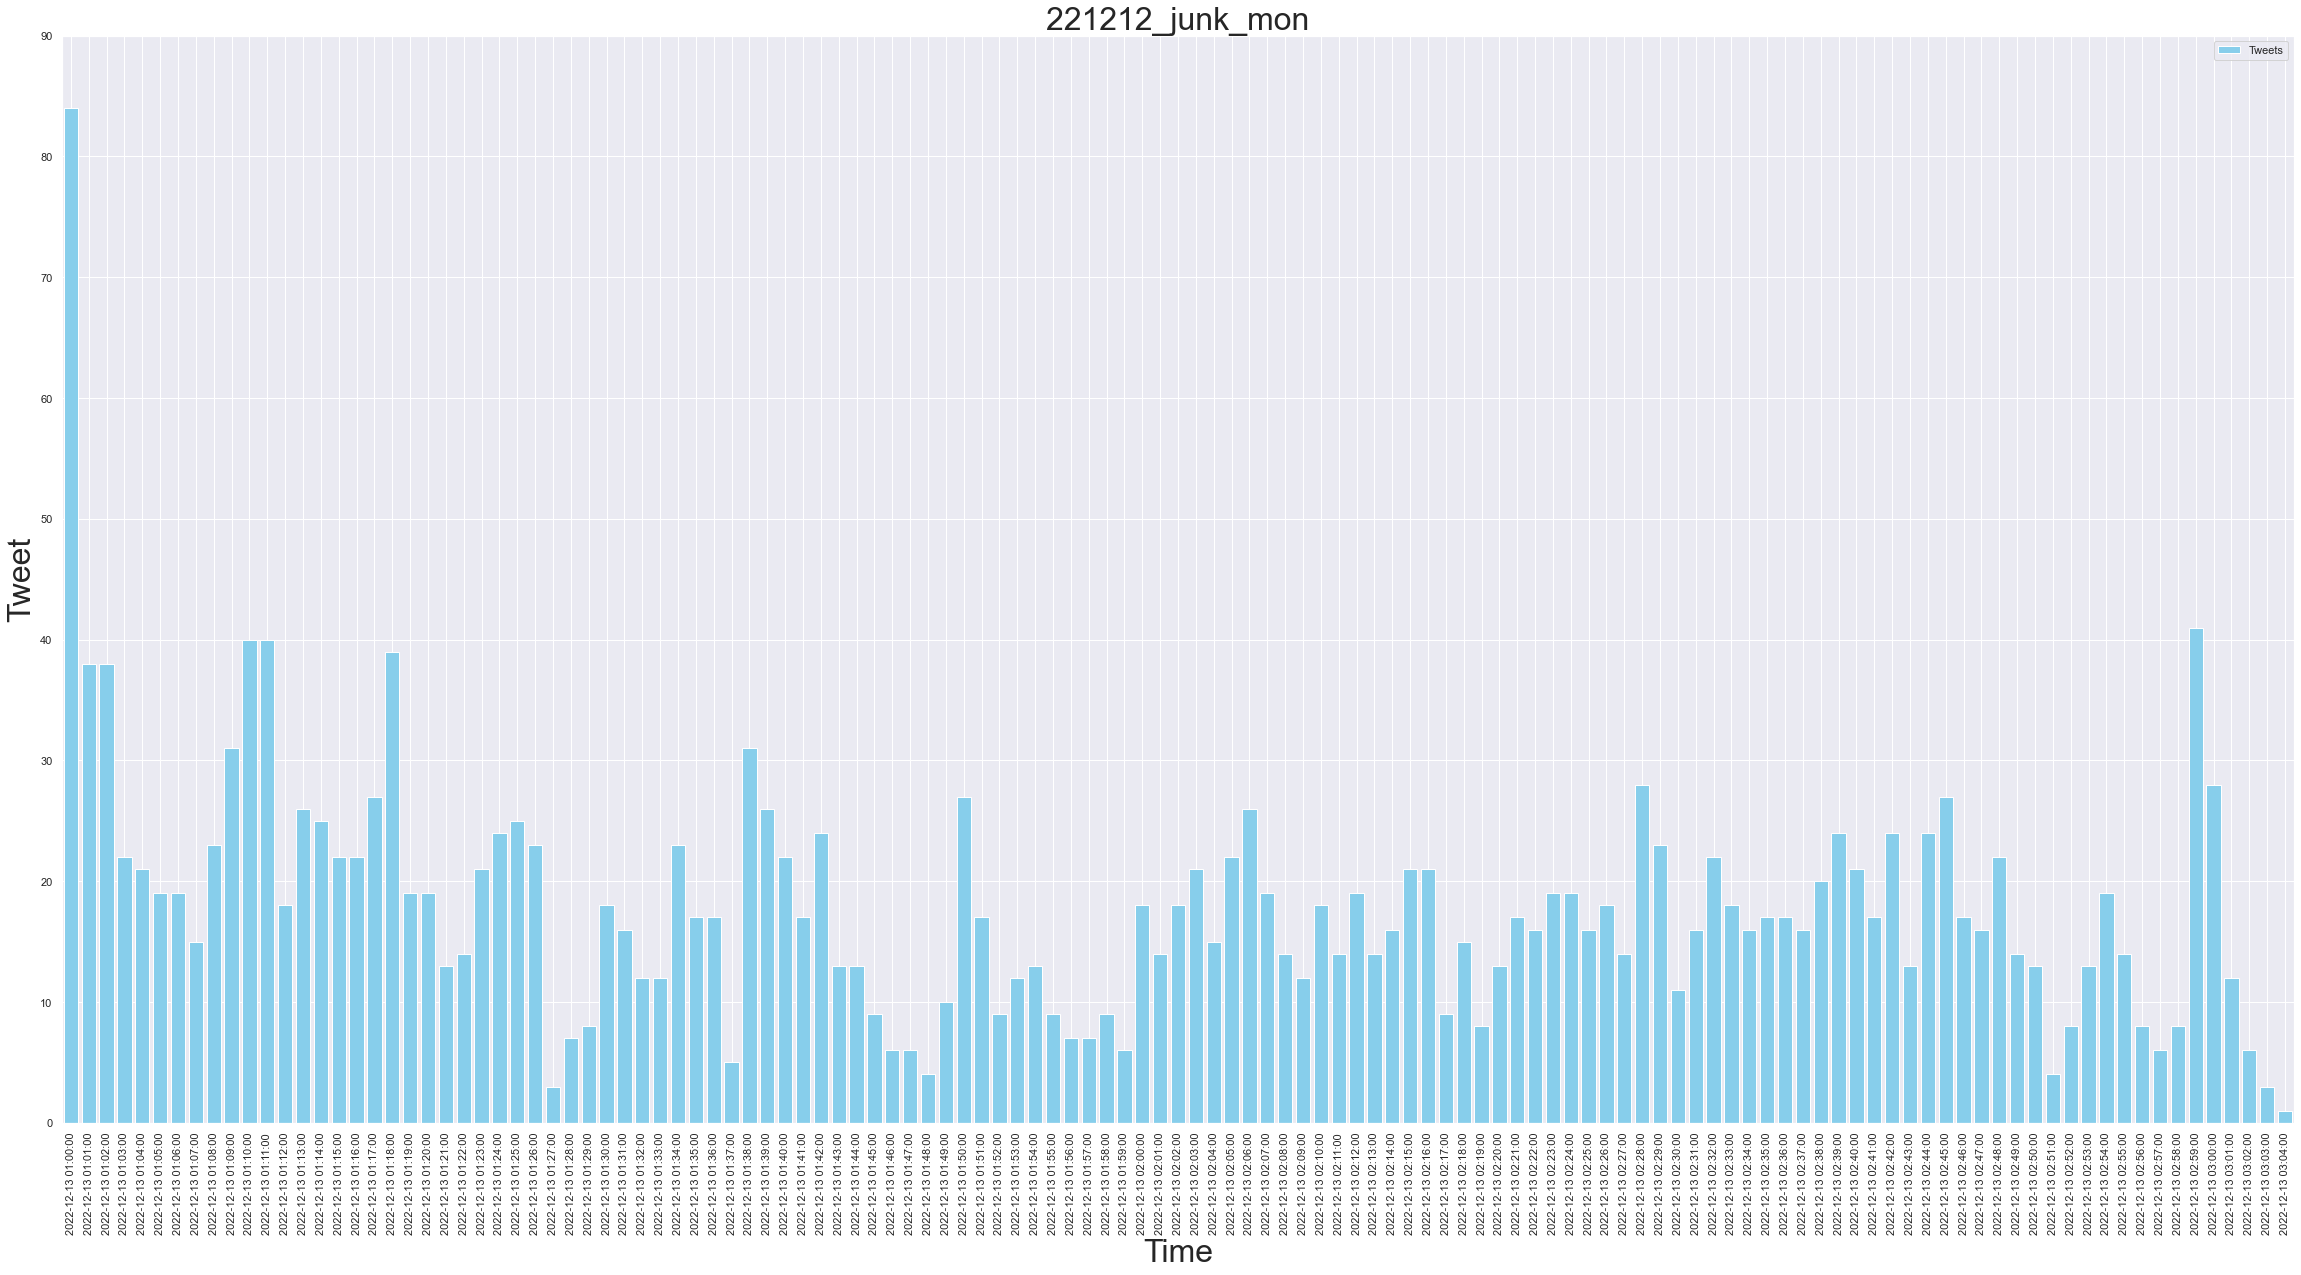

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221212_junk_mon", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 90) # y軸の範囲を指定する
start = 0
end = 91
stepsize = 10
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")